In [5]:
from pathlib import Path
import numpy as np

DATA_PATH = Path('/Volumes/Samsung_SSD/CIME-PPG-dataset-2018')

## Prepare pytorch dataset

In [6]:
train_input = np.load(DATA_PATH / 'train_input_processed.npy')
train_output = np.load(DATA_PATH / 'train_output_processed.npy')
test_input = np.load(DATA_PATH / 'test_input_processed.npy')
test_output = np.load(DATA_PATH / 'test_output_processed.npy')

In [7]:
print(f'{train_input.shape=}, {train_output.shape=}, {test_input.shape=}, {test_output.shape=}')

train_input.shape=(5000, 3, 3000), train_output.shape=(5000, 1, 3000), test_input.shape=(1900, 3, 3000), test_output.shape=(1900, 1, 3000)


### Make heart beat phase labels from clean PPG signal

The label making procedure is different with that used in original article. The original method is to apply a self organizing map (SOM) described in the following article:
> Ghosal, Purbadri, and Rajarshi Gupta. "Classification of photoplethysmogram signal using self organizing map." 2015 IEEE International Conference on Research in Computational Intelligence and Communication Networks (ICRCICN). IEEE, 2015.

While as the ground truth PPG is quite clean, I applied a simple peak detection to make the systolic/diastolic phases. (Without manually investigating the correctness.)

In [8]:
from scipy import signal as sci_signal

def sep_sys_dia(clean_ppg, fs):
    peaks_idx = sci_signal.find_peaks(clean_ppg, distance=fs//2)[0]
    onsets_idx = sci_signal.find_peaks(-clean_ppg, distance=fs//2)[0]
    
    if peaks_idx[0] < onsets_idx[0]:
        onsets_idx = np.r_[0, onsets_idx]

    phase_label = np.zeros(len(clean_ppg))
    for _o, _p in zip(onsets_idx, peaks_idx):
        phase_label[_o: _p] = 1
    
    return phase_label
    

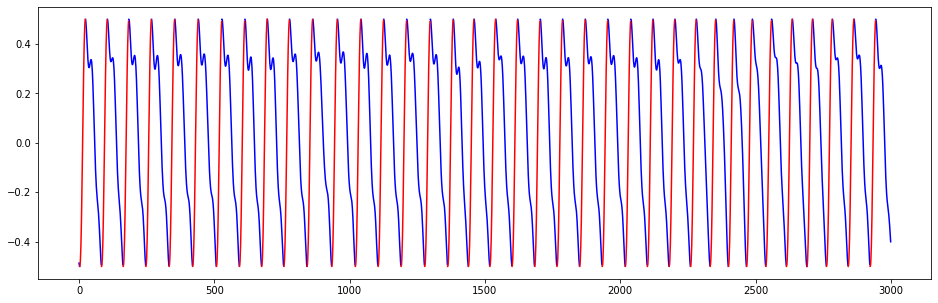

In [32]:
# Visualize the labelling result with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fs = 100

example_ppg = train_output[0, 0]
example_phase_label = sep_sys_dia(example_ppg, fs)

fig_label, ax_label = plt.subplots(figsize=(16, 5))
ax_label.plot(np.ma.masked_where(example_phase_label == 1, example_ppg), c='blue', label='diastolic phase')
ax_label.plot(np.ma.masked_where(example_phase_label == 0, example_ppg), c='red', label='systolic phase')


In [38]:
fs = 100
train_label = np.array([[sep_sys_dia(_train_out[0], fs=fs)] for _train_out in train_output])
test_label = np.array([[sep_sys_dia(_test_out[0], fs=fs)] for _test_out in test_output])

In [39]:
print(f'{train_label.shape=}, {test_label.shape=}')

train_label.shape=(5000, 1, 3000), test_label.shape=(1900, 1, 3000)


### Make PyTorch Dataset

In [ ]:
from torch.utils.data import Dataset


class 
